In [1]:
# Write an R-script to simulate the conditional probabilities of the distributions for winning a car vs. a goat for the
# Monty Hall Problem. Include the cases of switching or not switching. In your report, compare these cases to determine the
# best strategy. Show histograms and summary statistics (at least mean and variance) of the results for winning the car or 
#    a goat for both strategies, switching or not switching. Be sure to state and support your recommended strategy. 

doors <- c("A", "B", "C")

N = 10000

changewin <- rep(0, N)
staywin <- rep(0, N)

for(i in 1:N) {
    prize <- sample(doors)[1] # the door with the prize/car hidden behind
    pick <- sample(doors)[1]  # the door picked up by contestent
    open <- sample(doors[which(doors != pick & doors != prize)])[1] # the door opened by Monte
    switchyes <- doors[which(doors != pick & doors != open)]

    changewin[i] <- ifelse(switchyes == prize, 1, 0)
    staywin[i] <- ifelse(pick == prize, 1, 0)        
}
        
## Proportion of wins
change_perc <- mean(changewin)
stay_perc <- mean(staywin)

## To display the results with proper formatting
d1 <- "\n Monty Hall Problem Simulation\n\n\"Don't Switch\"\n"
d2 <- "\n                           Wins = "
d3 <- "\n               Number of Trials = "
d4 <- "\n    Mean of probability of observed Winning Proportion = "
d7 <- "\n    Variance of the probability of Winning Proportion = "
d5 <- "\n Theoretical Winning Proportion = "
d6 <- "\n\n\"Switch to Other Door\"\n"
        
      
cat(d1, d2, sum(staywin), d3, N, d4, stay_perc, d7, var(staywin), d5, 1/3, d6,
    d2, sum(changewin), d3, N, d4, change_perc, d7, var(changewin), d5, 2/3)



 Monty Hall Problem Simulation

"Don't Switch"
 
                           Wins =  3294 
               Number of Trials =  10000 
    Mean of probability of observed Winning Proportion =  0.3294 
    Variance of the probability of Winning Proportion =  0.2209177 
 Theoretical Winning Proportion =  0.3333333 

"Switch to Other Door"
 
                           Wins =  6706 
               Number of Trials =  10000 
    Mean of probability of observed Winning Proportion =  0.6706 
    Variance of the probability of Winning Proportion =  0.2209177 
 Theoretical Winning Proportion =  0.6666667

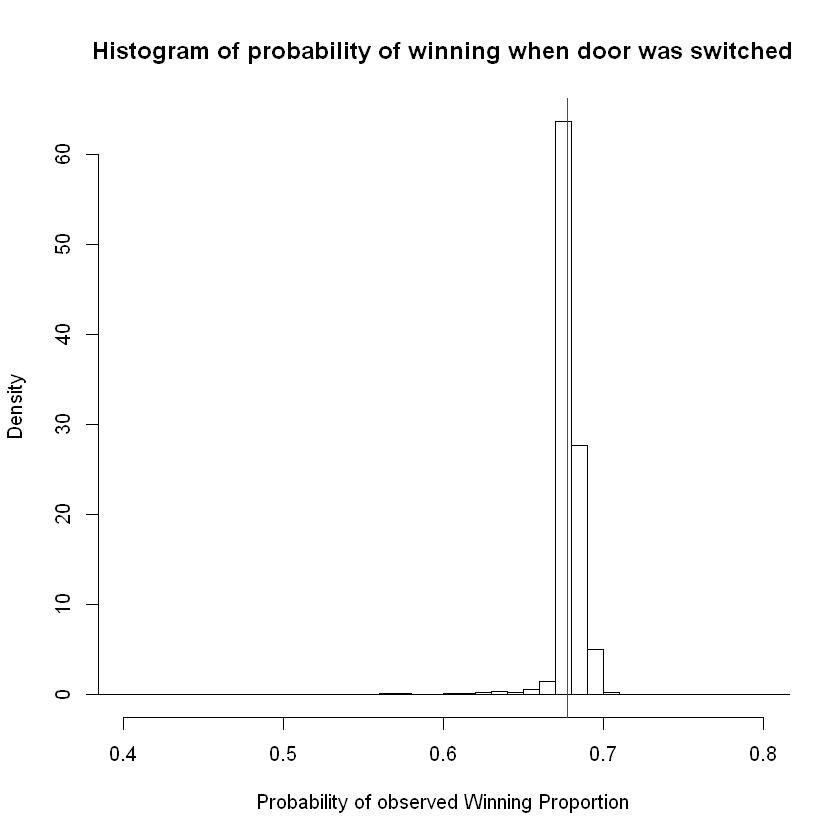

In [31]:
changewinHist = cumsum(changewin)/c(1:N)
hist(changewinHist, breaks=100, freq=FALSE, xlab="Probability of observed Winning Proportion", xlim=c(0.4,0.8),
     main="Histogram of probability of winning when door was switched")
abline(v=mean(changewinHist),col="red")

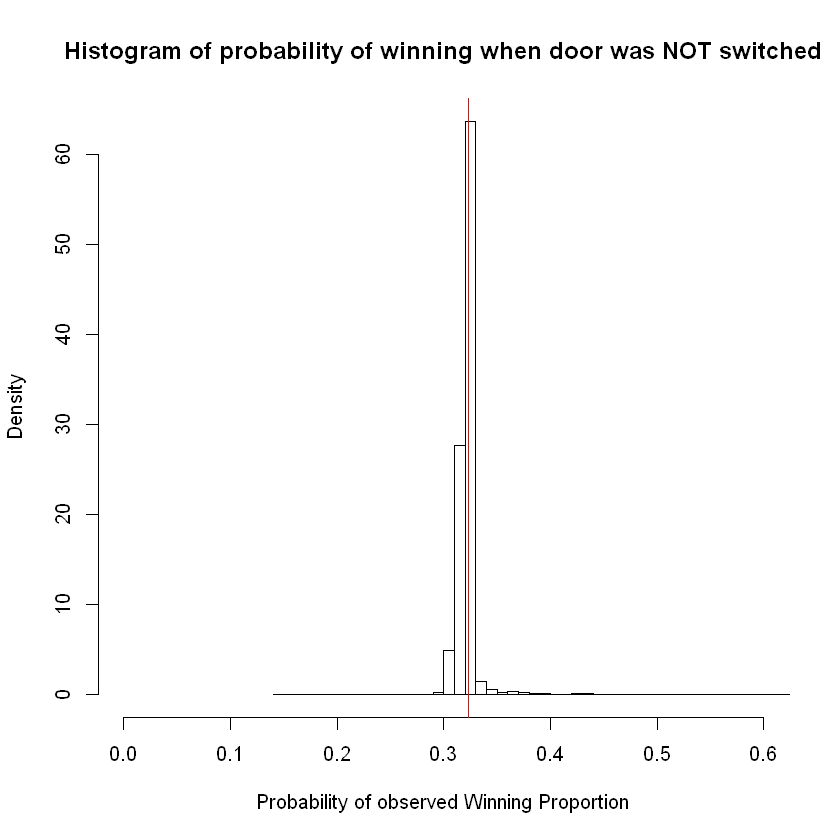

In [29]:
staywinHist = cumsum(staywin)/c(1:N)
hist(staywinHist, breaks=100, freq=FALSE, xlab="Probability of observed Winning Proportion", xlim=c(0,0.6),
     main="Histogram of probability of winning when door was NOT switched")
abline(v=mean(staywinHist),col="red")

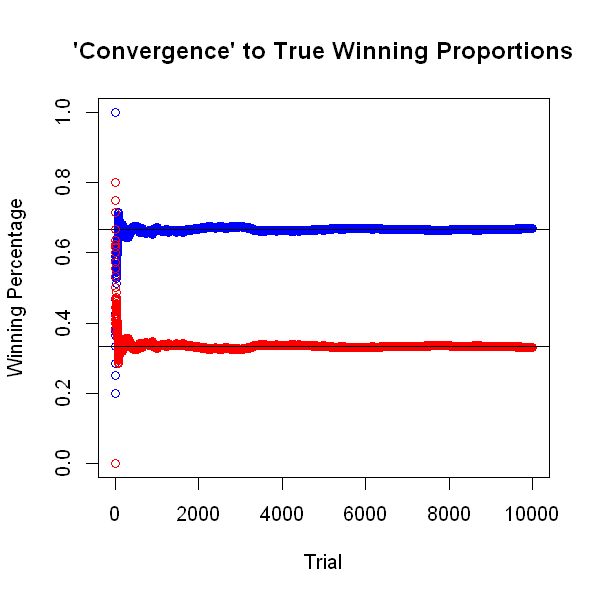

In [106]:
## Plot 'convergence' to true winning proportions
## Blue is switching doors, red is staying
plot.new()
plot(cumsum(changewin) / c(1:N), main = "'Convergence' to True Winning Proportions",
     xlab = "Trial", ylab = "Winning Percentage", ylim = c(0, 1), col = "blue")
abline(h = 2/3)
points(cumsum(staywin) / c(1:N), type = "p", col = "red")
abline(h = 1/3)